In [1]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy.io.wavfile
from scipy.signal import correlate
from IPython.display import Audio
from audio import *
from operator import truediv 

In [7]:
#generating white noise signal 
fs = 44100
T = 5
transmitted_noise = np.random.normal(0,1000,fs * 2 * T)
scipy.io.wavfile.write(r"noise.wav", fs, transmitted_noise.astype(np.int16))

In [8]:
Audio("noise.wav")

In [58]:
#record noise signal 

record_audio('received_noise.wav', T, fs)




Recording
Finished recording


In [4]:
received_noise= scipy.io.wavfile.read('received_noise.wav', mmap=False)[1]

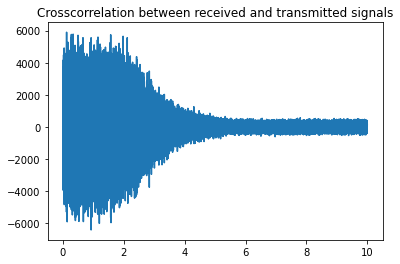

880639

In [5]:
#define auto and cross correlations
transmitted_noise = transmitted_noise[:len(received_noise)]

ac= scipy.signal.correlate(transmitted_noise, transmitted_noise, mode='full', method='auto')
cc= scipy.signal.correlate(transmitted_noise, received_noise, mode='full', method='auto')


time = np.linspace(0, T, num= len(received_noise))



#plt.title('Autocorrelation of transmitted signal')
#plt.plot(time, ac)
#plt.show()

plt.title('Crosscorrelation between received and transmitted signals')
plt.plot(time, received_noise)
plt.show()

len(cc)
len(ac)

220159
220159


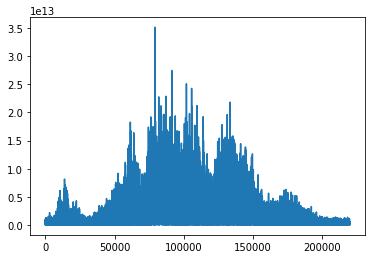

In [27]:
#taking dft

dft_ac= np.fft.fft(ac, n=None, axis=-1, norm=None)
dft_cc= np.fft.fft(cc, n=None, axis=-1, norm=None)



dft_ac = dft_ac[:int(len(dft_ac)/2)]
dft_cc = dft_cc[:int(len(dft_cc)/2)]
print(len(dft_cc))
print(len(dft_ac))

freq = np.linspace(0,len(dft_cc),len(dft_cc))
plt.plot(freq,abs(dft_cc))

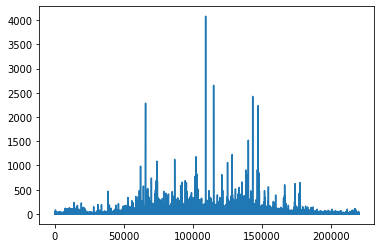

In [42]:
#finding psd

psd = np.zeros_like(dft_cc)

for i in range(len(dft_cc)):
    psd[i] = dft_cc[i] / dft_ac[i]

freq = np.linspace(0,len(dft_ac),len(dft_ac))

plt.figure(1)
plt.plot(freq, abs(psd))
plt.show()